##### In this project, 
Steps:

1: Importing libraries and Exploring the Dataset.

2: Checking missing values.

3: Creating visual methods to analyze the data.

4: Analyzing trends, patterns, and relationships in the Data

5: Appling logestic regression model, Confusion matrix,and classification report


### 1: Importing libraries and Exploring the Dataset

In [42]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy
sns.set() #setting the default seaborn style for our plots

In [43]:
## reading the datset and displaying first 5 rows
stars=pd.read_csv('pulsar_stars.csv')
stars.head(5)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [44]:
#Info about the data shape , type , number of enteries
stars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                17898 non-null  float64
 1    Standard deviation of the integrated profile  17898 non-null  float64
 2    Excess kurtosis of the integrated profile     17898 non-null  float64
 3    Skewness of the integrated profile            17898 non-null  float64
 4    Mean of the DM-SNR curve                      17898 non-null  float64
 5    Standard deviation of the DM-SNR curve        17898 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7    Skewness of the DM-SNR curve                  17898 non-null  float64
 8   target_class                                   17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


output:
The data consists of 17898 instances with 9 attributes. 1 integer type, 8 float type

In [48]:
# a brief summary for the dataset
stars.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


### 2: Checking missing values

In [56]:
# Check for the null values 
stars.isna().apply(pd.value_counts)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
False,17898,17898,17898,17898,17898,17898,17898,17898,17898


Output:
There isn't missing values

### 3: Creating visual methods to analyze the data.

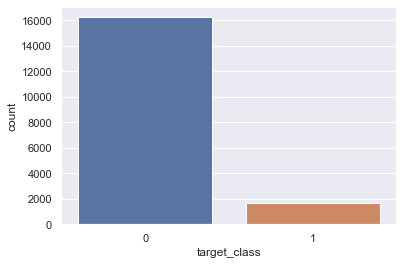

In [9]:
sns.countplot(stars['target_class'])

In [66]:
#Changing the name of some columns
stars.columns = ['mean_profile', 'std_profile', 'kurtosis_profile', 'skewness_profile', 'mean_dmsnr',
               'std_dmsnr', 'kurtosis_dmsnr', 'skewness_dmsnr', 'target']

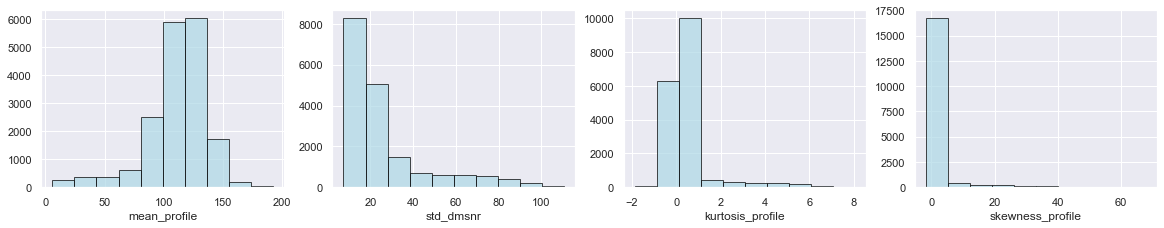

In [68]:
# Plots to see the distribution of the discret features individually

plt.figure(figsize= (20,15))
plt.subplot(4,4,1)
plt.hist(stars.mean_profile, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('mean_profile')

plt.subplot(4,4,2)
plt.hist(stars.std_dmsnr, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('std_dmsnr')

plt.subplot(4,4,3)
plt.hist(stars.kurtosis_profile, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('kurtosis_profile')

plt.subplot(4,4,4)
plt.hist(stars.skewness_profile, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('skewness_profile')

plt.show()

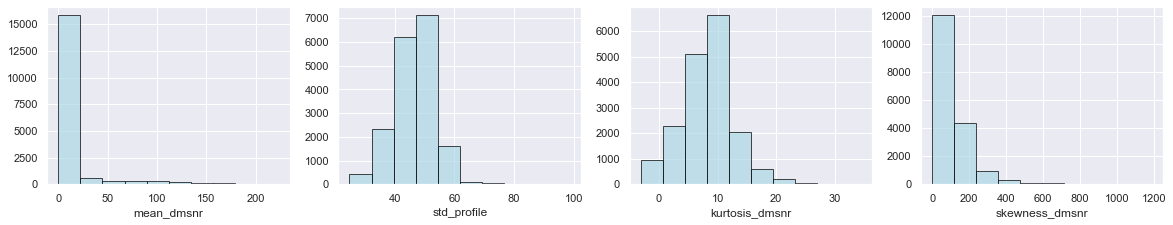

In [70]:
# Plots to see the distribution of the discret features individually

plt.figure(figsize= (20,15))
plt.subplot(4,4,1)
plt.hist(stars.mean_dmsnr, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('mean_dmsnr')

plt.subplot(4,4,2)
plt.hist(stars.std_profile, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('std_profile')

plt.subplot(4,4,3)
plt.hist(stars.kurtosis_dmsnr, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('kurtosis_dmsnr')

plt.subplot(4,4,4)
plt.hist(stars.skewness_dmsnr, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('skewness_dmsnr')

plt.show()

### 4: Analyzing trends, patterns, and relationships in the Data.

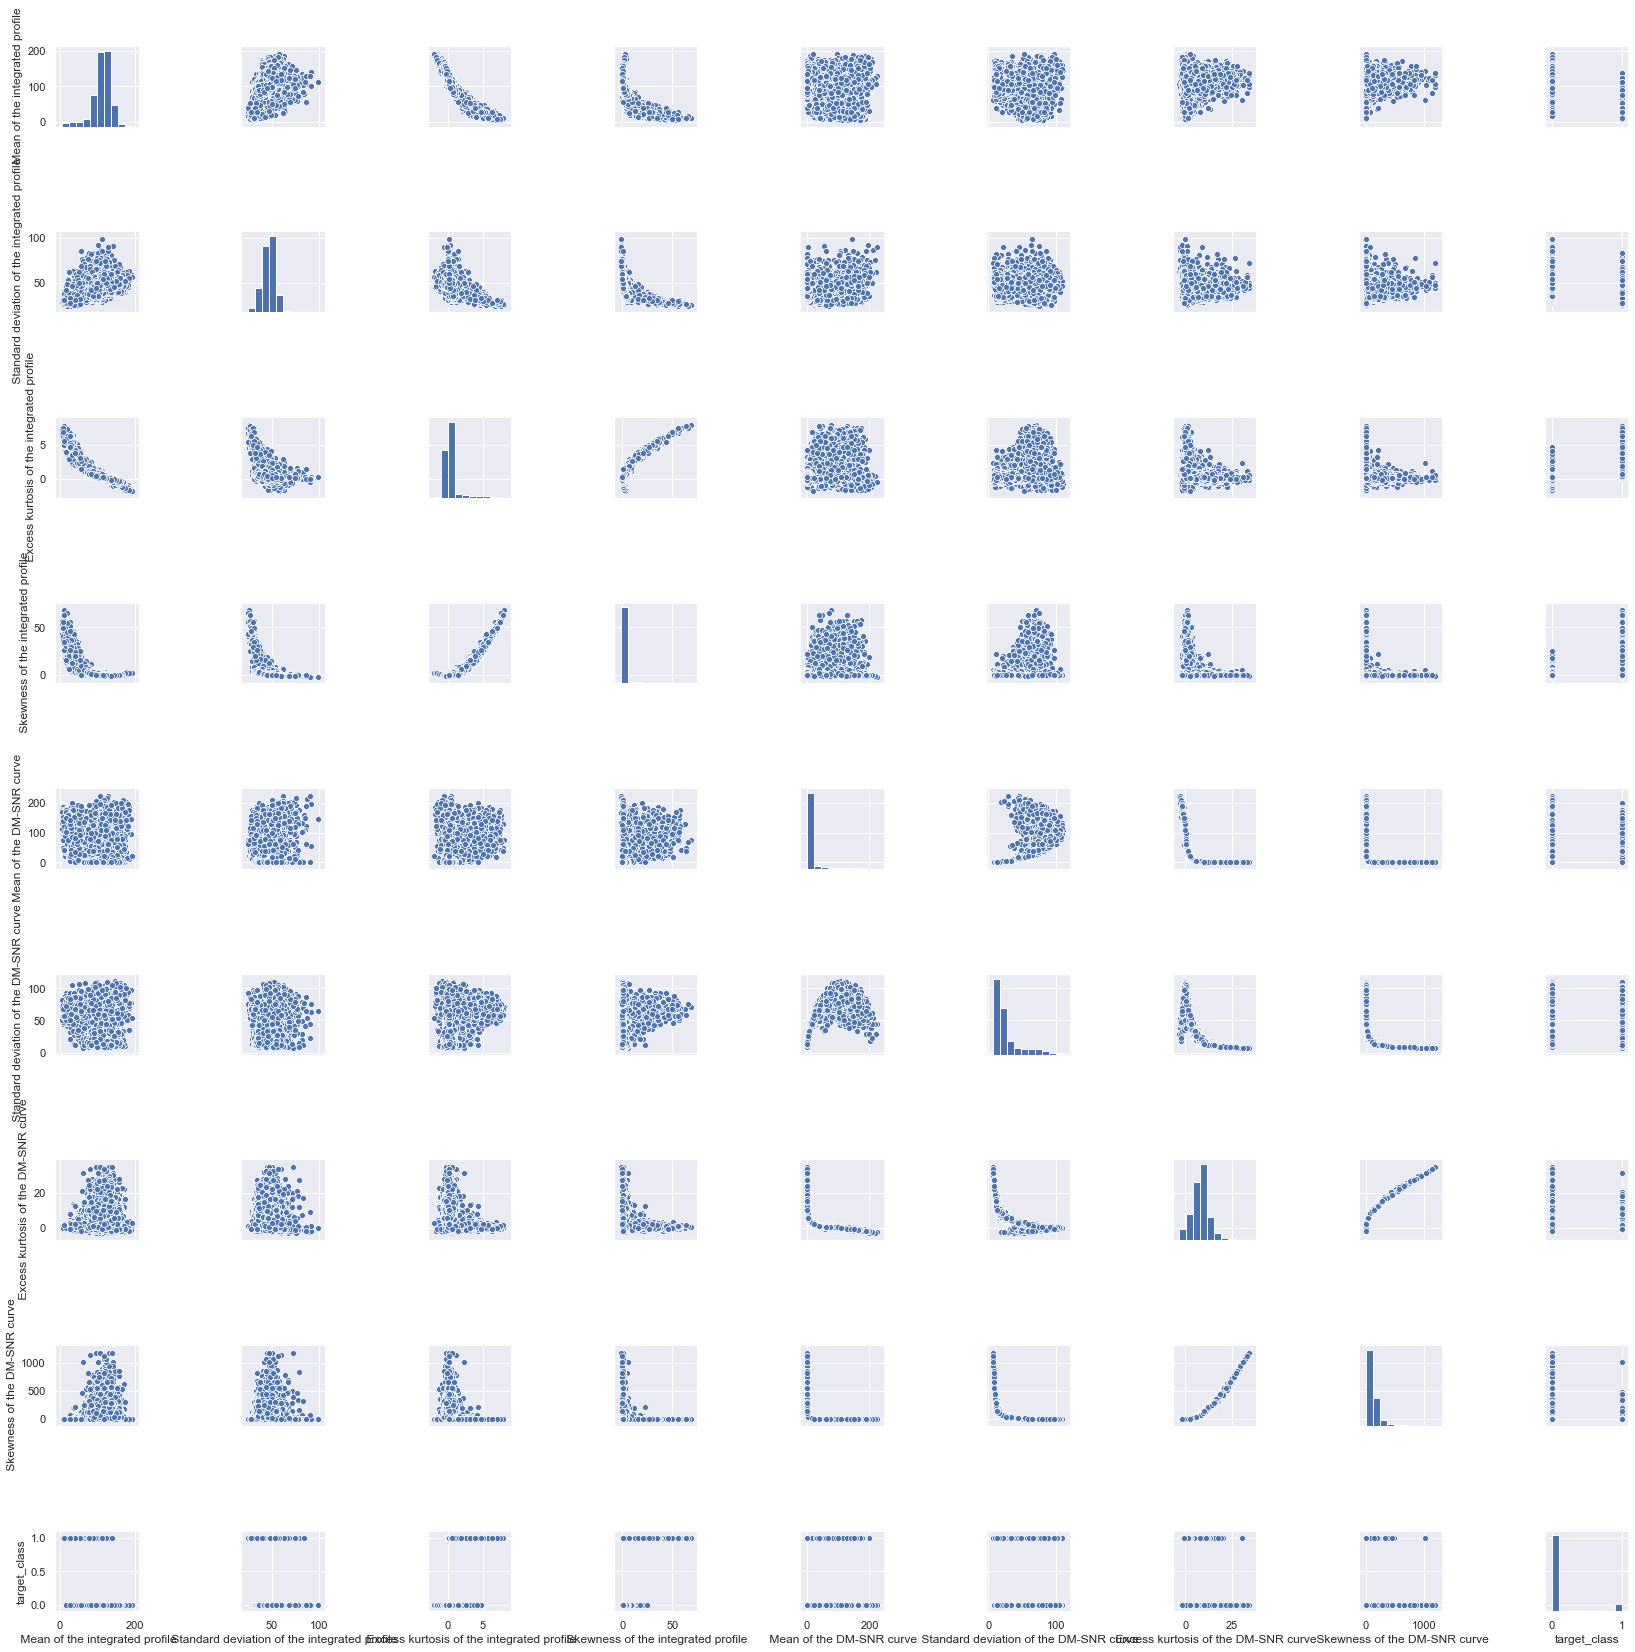

In [49]:
# Label encoding for the variables to include strings in the pairplot

stars_encoded = copy.deepcopy(stars)
stars_encoded.loc[:,['target_class']] = stars_encoded.loc[:,['target_class']].apply(LabelEncoder().fit_transform) 
sns.pairplot(stars_encoded)  #pairplot
plt.show()

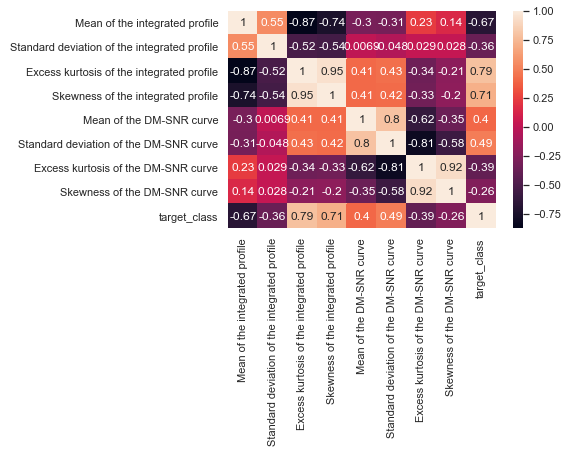

In [50]:
#plot correlation matrix

sns.heatmap(stars.iloc[:,0:9].corr(), annot=True)

From the above heatmap

there are four features that are positively correlated to the target and the other four are negatively correlated


### 5: Appling logestic regression model, Confusion matrix,and classification report

In [34]:
# Importing the dataset
stars=pd.read_csv('pulsar_stars.csv')
X = stars.iloc[:,0:8].values
y = stars.iloc[:,8].values

In [35]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 41)

In [36]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [37]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


In [39]:
cm

array([[4054,   28],
       [  74,  319]], dtype=int64)

In [40]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test, y_pred)
acc

0.9772067039106145

In [46]:
from sklearn.metrics import classification_report
cr=classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4082
           1       0.92      0.81      0.86       393

    accuracy                           0.98      4475
   macro avg       0.95      0.90      0.92      4475
weighted avg       0.98      0.98      0.98      4475

